Preparing the dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

cars_df = pd.read_csv('data/CarsData.csv')

In [4]:
cars_df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


### Checking the distribution of categorical data

In [7]:

print("\nDistribution of categorical data:")

print(cars_df['fuelType'].value_counts())
print(cars_df['transmission'].value_counts())
print(cars_df['Manufacturer'].value_counts())
print(cars_df['model'].value_counts())


Distribution of categorical data:
fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64
transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64
Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64
model
 Fiesta     6509
 Golf       4797
 Focus      4555
 C Class    3694
 Corsa      3285
            ... 
E Class        1
200            1
 Ranger        1
180            1
220            1
Name: count, Length: 196, dtype: int64


### Encoding Categorical Data:

Encoding categorical variables such as 'model', ‘fuelType’, ‘Manufacturer’, and ‘transmission’ into numerical representations, preparing the dataset for machine learning algorithms.

In [10]:
from sklearn.preprocessing import LabelEncoder
columns = ['model', 'transmission', 'fuelType', 'Manufacturer']

lEnc = LabelEncoder()

for col in columns:
    cars_df[col] = lEnc.fit_transform(cars_df[col])

cars_df.head()


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,2017,7495,1,11630,4,145,60.1,1.0,3
1,115,2017,10989,1,9200,4,145,58.9,1.0,8
2,1,2019,27990,3,1614,0,145,49.6,2.0,1
3,184,2017,12495,1,30960,0,150,62.8,2.0,5
4,60,2017,7999,1,19353,4,125,54.3,1.2,2


#Preparetion data splitted into test and train data subsets and applied to regression algorithms.

#Splitting the data:#

We use the train_test_split function to split the features (X) and the target variable (Y) into training and testing sets. 
The test_size parameter specifies the proportion of the dataset to include in the testing set, which is set to 0.3 (30%). 
The random_state parameter ensures reproducibility of the split.

In [11]:
from sklearn.model_selection import train_test_split

X = cars_df.drop('price', axis=1)
Y = cars_df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

We trained 4 machine learning models, Linear Regression, Lasso Regression, RandomForest Regression,  on the training data and evaluated their performance on both training and testing sets.

We’ll train a Linear Regression model on the training data to predict car prices.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading the Linear Regression model
lRegModel = LinearRegression()

lRegModel.fit(X_train, Y_train)

#Model Evaluation (evaluate the performance of the trained Linear Regression model)
lrPredicts = lRegModel.predict(X_test)

# Calculating the R squared error
# R squared is a statistical measure of how well the regression predictions approximate the actual data points. 
# It ranges from 0 to 1, where a value closer to 1 indicates a better fit.
errorScoreLR = r2_score(Y_test, lrPredicts)
print("R squared Error LinearRegression : ", errorScoreLR)

#The calculated R squared error for the training data is approximately 0.7155

R squared Error LinearRegression :  0.7155492251126916


#Model Training: Lasso Regression

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection 
and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. 
The lasso method assumes that the coefficients of the linear model are sparse, meaning that few of them are non-zero.

In [14]:
from sklearn.linear_model import Lasso

lassoModel = Lasso()

# Fitting the model to the training data
lassoModel.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction = lassoModel.predict(X_train)

errorScoreLasso = r2_score(Y_train, training_data_prediction)
print("R squared Error Lasso ", errorScoreLasso)

R squared Error Lasso  0.7213447884132916


In [19]:
# Prediction on testing data
lassoPredicts = lassoModel.predict(X_test)
# Calculating the R squared error for testing data
errorScoreLassoTest = r2_score(Y_test, lassoPredicts)
print("R squared Error Lasso: ", errorScoreLassoTest)

R squared Error for Testing Data:  0.7155554402449158


#### Model Training: RandomForest Regression

The next method to build prediction models is Random forest regression method and can be used in sklearn.ensemble library with RandomForestRegressor indicator.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
rfrPredicts = rfr.predict(X_test)

rfrScore = r2_score(Y_test, rfrPredicts)
rfrError = np.sqrt(mean_squared_error(Y_test, rfrPredicts))
print('R2-Score RFR ', rfrScore)
print('Error square RFR ', rfrError)
# The coefficients

R2-Score RFR  0.9597967590499554
Error square RFR  1974.1808598611647


In [34]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, rfrPredicts))
print('MSE:', metrics.mean_squared_error(Y_test, rfrPredicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rfrPredicts)))

MAE: 1188.4450041619095
MSE: 3943558.19058672
RMSE: 1985.8394171198033


#### Extra gradient boosting algorithm

which is one of the most used algorithms in numerical value estimation models is used. Xgboost has the implementation of this very popular algorithm and It is used in car price prediction modelling.

Machine learning algorithms that is useful for conducting classification and prediction problems.

In [20]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, Y_train)
xgbPredicts = xgb.predict(X_test)
xgbScore = r2_score(Y_test, xgbPredicts)
xgbError = np.sqrt(mean_squared_error(Y_test, xgbPredicts))

print("R squared Error Lasso: ", errorScoreLassoTest)
print("R squared Error LinearRegression : ", errorScoreLR)
print('R2-Score RFR ', rfrScore)
print('Error square RFR ', rfrError)
print('R2-Score XGB ', xgbScore)
print('Error square XGB ', xgbError)


R squared Error Lasso:  0.7155554402449158
R squared Error LinearRegression :  0.7155492251126916
R2-Score RFR  0.9597967590499554
Error square RFR  1974.1808598611647
R2-Score XGB  0.9619299383515105
Error square XGB  1921.092137959486


We calculate the R squared error using the r2_score function from the metrics module. R squared is a statistical measure of how well the regression predictions approximate the actual data points. It ranges from 0 to 1, where a value closer to 1 indicates a better fit.

After training, R2 score and error square are listed. This R2 value shows that the model is able to predict the estimated value but has low success rate. So It can be considered to improve the dataset a bit by extracting the vehicle age from model year and since the mileage value is the numeric value, It can be standardized to more fit to the model

When comparing the random forest regression model and the Xgboost model, It can be said that the Xgboost model has better results. 
With an R2 value is 0.96. 
Accuracy level can be boosted by adding more data and completing missing values or crawling other highly correlated features such as gasoline burned per kilometer etc.

RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB

#### Visualize the relationship between the actual car prices and the prices predicted by our models, providing insights into their accuracy and generalization ability.

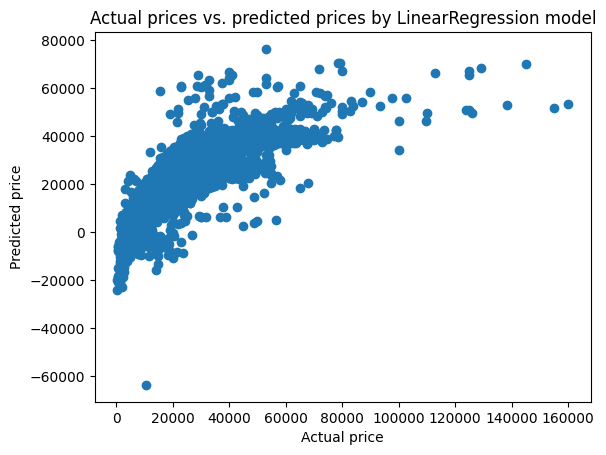

In [44]:
plt.scatter(Y_test, lrPredicts)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs. predicted prices by LinearRegression model")
plt.show()

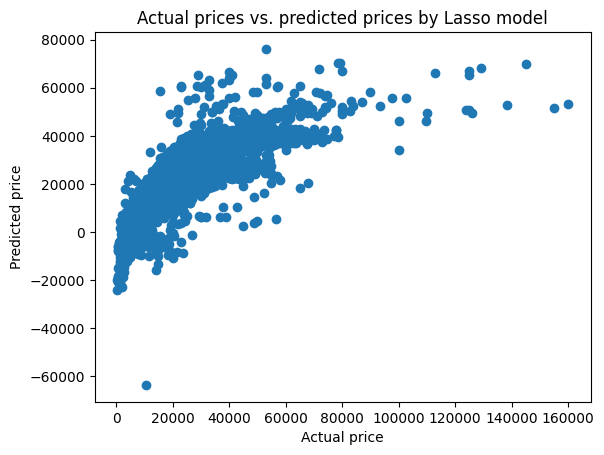

In [47]:
plt.scatter(Y_test, lassoPredicts)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs. predicted prices by Lasso model")
plt.show()

Text(0, 0.5, 'Predicted Y')

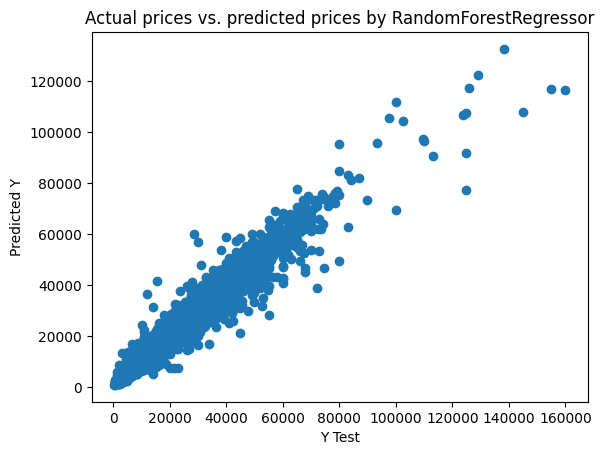

In [40]:
plt.scatter(Y_test, rfrPredicts)
plt.title('Actual prices vs. predicted prices by RandomForestRegressor')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0, 0.5, 'Predicted Y')

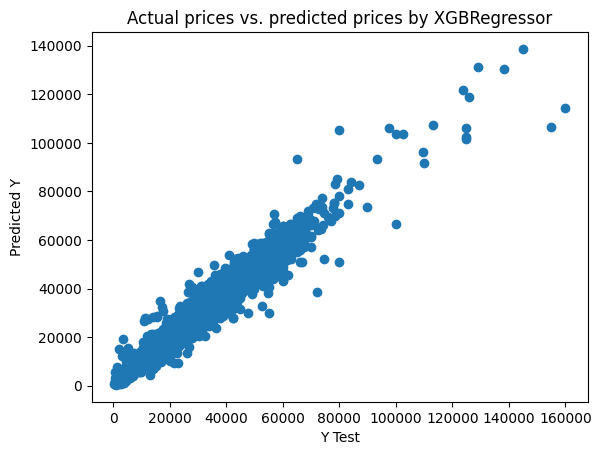

In [41]:
plt.scatter(Y_test, xgbPredicts)
plt.title('Actual prices vs. predicted prices by XGBRegressor')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')